# MANOJ KUMAR - 2048015

## importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score

## import Dataset

In [2]:
dataset = pd.read_csv('kidney_disease.csv')

In [3]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
dataset.shape

(400, 26)

In [5]:
dataset.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

### Cleaning and preprocessing of data for training

In [6]:
dataset[['htn','dm','cad','pe','ane']]=dataset[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
dataset[['rbc','pc']] = dataset[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
dataset[['pcc','ba']] = dataset[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
dataset[['appet']] = dataset[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
dataset['classification']=dataset['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
dataset.rename(columns={'classification':'class'},inplace=True)

In [7]:
# Further cleaning
dataset['pe'] = dataset['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
dataset['appet'] = dataset['appet'].replace(to_replace='no',value=0)
dataset['cad'] = dataset['cad'].replace(to_replace='\tno',value=0)
dataset['dm'] = dataset['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
dataset.drop('id',axis=1,inplace=True)

In [8]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [9]:
# '?' character remove process in the dataset
for i in ['rc','wc','pcv']:
    dataset[i] = dataset[i].str.extract('(\d+)').astype(float)

In [10]:
# Filling missing numeric data in the dataset with mean
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    dataset[i].fillna(dataset[i].mean(),inplace=True)

In [11]:
dataset.isnull().sum()

age        0
bp         0
sg         0
al         0
su         0
rbc      152
pc        65
pcc        4
ba         4
bgr        0
bu         0
sc         0
sod        0
pot        0
hemo       0
pcv        0
wc         0
rc         0
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [12]:
dataset = dataset.dropna(axis=1) 

In [13]:
dataset.shape

(400, 15)

In [14]:
dataset.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
class    0
dtype: int64

In [15]:
dataset.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,class
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.000000,1.0
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.241636,1.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.241636,1.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.000000,1.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.000000,1.0


In [16]:
#Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [17]:
# Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

In [18]:
#Splitting the dataset in to training and testing set
X_train , X_test , y_train , y_test   = train_test_split(X,y,test_size = 0.2 , random_state=123)  

## Logistic Regression


In [19]:
# Training the Logistic Regression model on the Training set
lg = LogisticRegression(random_state = 0)
lg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [20]:
#predictin the test result
y_pred_lg = lg.predict(X_test) 

In [21]:
#calculate accuracy
score_lg = accuracy_score(y_pred_lg,y_test)
score_lg

0.9875

In [22]:
print("train score - " + str(lg.score(X_train, y_train)))
print("test score - " + str(lg.score(X_test, y_test)))

train score - 0.984375
test score - 0.9875


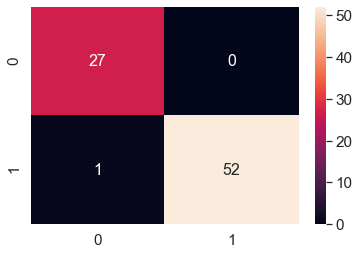

In [23]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lg = confusion_matrix(y_test,y_pred_lg)
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_lg, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [24]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        27
         1.0       1.00      0.98      0.99        53

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



## Decision Tree Classifier

In [25]:
#fitting Decision Tree to the training set 
dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [26]:
#predictin the test result
y_pred_dtc = dtc.predict(X_test) 

In [27]:
#calculate accuracy
score_dtc = accuracy_score(y_pred_dtc,y_test)
score_dtc

0.925

In [28]:
print("train score - " + str(dtc.score(X_train, y_train)))
print("test score - " + str(dtc.score(X_test, y_test)))

train score - 1.0
test score - 0.925


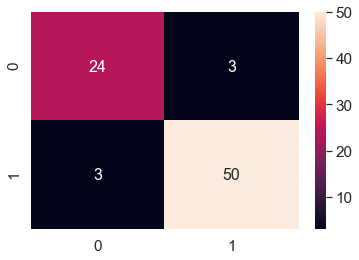

In [29]:
#Making the Confusion Matrix
cm_dtc = confusion_matrix(y_test,y_pred_dtc)

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_dtc, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [30]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        27
         1.0       0.94      0.94      0.94        53

    accuracy                           0.93        80
   macro avg       0.92      0.92      0.92        80
weighted avg       0.93      0.93      0.93        80



## K Nearest Neighbors Classifier

In [31]:
#fitting KNN to the training set
knn= KNeighborsClassifier(n_neighbors=5 , metric='minkowski',p=2  )
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [32]:
#predictin the test result
y_pred_knn = knn.predict(X_test) 

In [33]:
#calculate accuracy
score_dtc = accuracy_score(y_pred_knn,y_test)
score_dtc

0.9875

In [34]:
print("train score - " + str(knn.score(X_train, y_train)))
print("test score - " + str(knn.score(X_test, y_test)))

train score - 0.971875
test score - 0.9875


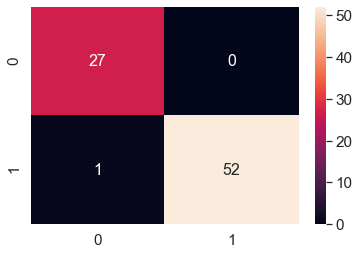

In [35]:
#Making the Confusion Matrix
cm_knn = confusion_matrix(y_test,y_pred_knn)

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_knn, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [36]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        27
         1.0       1.00      0.98      0.99        53

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



## Support Vector Machine

In [37]:
#fitting SVM to the training set
svm = SVC(kernel='linear', random_state=0)
svm.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [38]:
#predictin the test result
y_pred_svm = svm.predict(X_test) 

In [39]:
score_svm = accuracy_score(y_pred_svm,y_test)
score_svm

0.975

In [40]:
print("train score - " + str(svm.score(X_train, y_train)))
print("test score - " + str(svm.score(X_test, y_test)))

train score - 0.984375
test score - 0.975


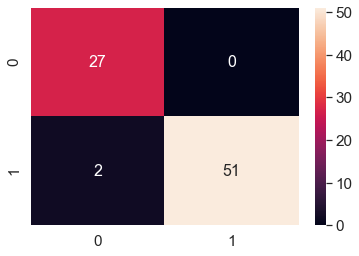

In [41]:
#Making the Confusion Matrix
cm_svm = confusion_matrix(y_test,y_pred_svm)

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_svm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [42]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        27
         1.0       1.00      0.96      0.98        53

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



## kernal SVM

In [43]:
#fitting kernal SVM to the training set
ksvm = SVC(kernel='rbf', random_state=0 )
ksvm.fit(X_train,y_train)

SVC(random_state=0)

In [44]:
#predictin the test result
y_pred_ksvm = ksvm.predict(X_test) 

In [45]:
#calculate accuracy
score_ksvm = accuracy_score(y_pred_ksvm,y_test)
score_ksvm

1.0

In [46]:
print("train score - " + str(ksvm.score(X_train, y_train)))
print("test score - " + str(ksvm.score(X_test, y_test)))

train score - 0.9875
test score - 1.0


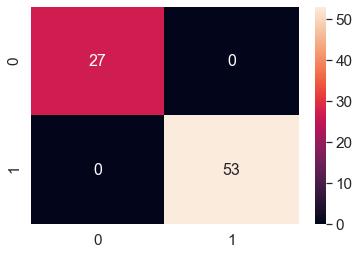

In [47]:
#Making the Confusion Matrix
cm_ksvm = confusion_matrix(y_test,y_pred_ksvm)
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_ksvm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [48]:
print(classification_report(y_test, y_pred_ksvm))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        27
         1.0       1.00      1.00      1.00        53

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



## Random Forest classification

In [49]:
#fitting Random Forest classification to the training set 
rfc = RandomForestClassifier(n_estimators=10 , criterion='entropy',random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [50]:
#predictin the test result
y_pred_rfc = rfc.predict(X_test) 

In [51]:
#calculate accuracy
score_rfc = accuracy_score(y_pred_rfc,y_test)
score_rfc

1.0

In [52]:
print("train score - " + str(rfc.score(X_train, y_train)))
print("test score - " + str(rfc.score(X_test, y_test)))

train score - 1.0
test score - 1.0


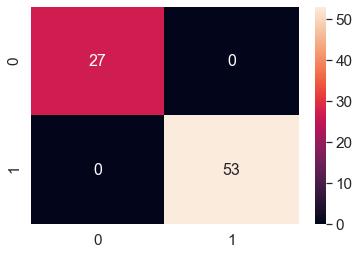

In [53]:
#Making the Confusion Matrix
cm = confusion_matrix(y_test,y_pred_rfc)

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [54]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        27
         1.0       1.00      1.00      1.00        53

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



## Kernal Navie Bayes

In [55]:
#fitting kernal Navie bayes to the training set 
knb = GaussianNB()
knb.fit(X_train,y_train)

GaussianNB()

In [56]:
#predictin the test result
y_pred_knb = knb.predict(X_test) 

In [57]:
#calculate accuracy
score_knb = accuracy_score(y_pred_knb,y_test)
score_knb

0.9

In [58]:
print("train score - " + str(knb.score(X_train, y_train)))
print("test score - " + str(knb.score(X_test, y_test)))

train score - 0.959375
test score - 0.9


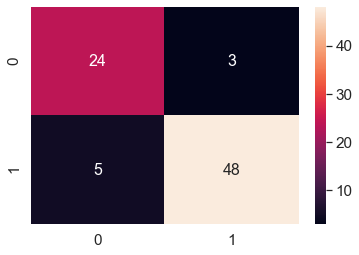

In [59]:
#Making the Confusion Matrix
cm_knb = confusion_matrix(y_test,y_pred_knb)

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_knb, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [60]:
print(classification_report(y_test, y_pred_knb))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86        27
         1.0       0.94      0.91      0.92        53

    accuracy                           0.90        80
   macro avg       0.88      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80

